In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import re

# Загрузка датасета

In [2]:
df = pd.read_csv('student_data.csv')
df.sample(3)

,student_id,name,age,gender,grade,major,gpa,attendance_rate,extracurricular_activities,study_hours_per_week,sleep_hours_per_day,distance_from_home_km
54,d238120b-1c55-4d02-b541-444ff97fddc2,Ernest Smith,NaN,Male,A,Math,3.82,74,Clubs,30,5.900026,2.00
49,3b7f68e3-9cd3-40c3-a9bd-0ff6c6b83117,William Schneider,23.0,Male,C,Math,2.60,95,NaN,24,7.189304,7.18
36,cc09948f-8400-4c79-a03f-2f1d85799c31,Erin Cuevas,20.0,Female,B,Science,3.47,82,Debate,10,7.252507,4.19



# Предварительная обработка

**1. Ознакомление с датасетом**

In [3]:
print(df.info())
print('\n', 'Shape:', df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   student_id                  103 non-null    object 
 1   name                        103 non-null    object 
 2   age                         91 non-null     float64
 3   gender                      98 non-null     object 
 4   grade                       103 non-null    object 
 5   major                       103 non-null    object 
 6   gpa                         93 non-null     float64
 7   attendance_rate             103 non-null    int64  
 8   extracurricular_activities  83 non-null     object 
 9   study_hours_per_week        103 non-null    int64  
 10  sleep_hours_per_day         103 non-null    float64
 11  distance_from_home_km       103 non-null    float64
dtypes: float64(4), int64(2), object(6)
memory usage: 9.8+ KB
None

 Shape: (103, 12)


In [4]:
df.describe()

,age,gpa,attendance_rate,study_hours_per_week,sleep_hours_per_day,distance_from_home_km
count,91.000000,93.000000,103.000000,103.000000,103.000000,103.000000
mean,22.725275,3.380430,84.436893,19.339806,7.057091,15.921845
std,8.907008,0.453767,9.221320,6.659143,1.135099,8.355548
min,18.000000,2.530000,70.000000,-5.000000,5.079151,1.110000
25%,20.000000,3.080000,77.000000,14.500000,6.054385,9.610000
50%,22.000000,3.340000,84.000000,19.000000,7.127454,16.350000
75%,23.000000,3.700000,91.500000,25.000000,8.010498,22.385000
max,80.000000,5.000000,100.000000,30.000000,8.957862,29.990000


Можно заметить, что минимальное кол-во часов обучения = -5. Очевидно, что эта запись некорректна. Скорее всего отрицательное значение вызвано ошибкой ввода, исправим её на положительное значение

Примечательно, что максимальный возраст студентов - 80 лет. Такие моменты подлежат уточнению у создателей датасета (DE, административные работники образовательной организации и т.д.)

Text(0.5, 1.0, 'Распределение учебных часов в неделю')

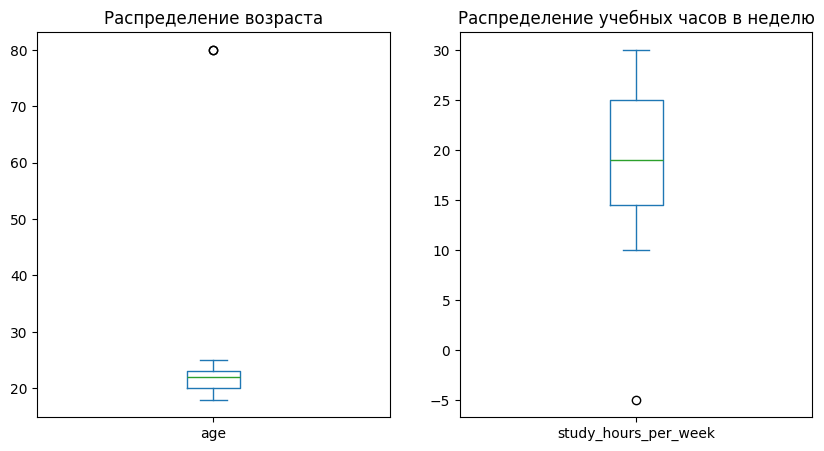

In [5]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
df.age.plot.box(ax=ax[0])
ax[0].set_title('Распределение возраста')
df.study_hours_per_week.plot.box(ax=ax[1])
ax[1].set_title('Распределение учебных часов в неделю')

In [6]:
# исправление отрицательного значения study_hours_per_week
df.loc[df['study_hours_per_week'] < 0, 'study_hours_per_week'] = df.loc[df['study_hours_per_week'] < 0, 'study_hours_per_week'] * -1

**2. Обработка пропусков**

In [7]:
df.isna().sum()

student_id                     0
name                           0
age                           12
gender                         5
grade                          0
major                          0
gpa                           10
attendance_rate                0
extracurricular_activities    20
study_hours_per_week           0
sleep_hours_per_day            0
distance_from_home_km          0
dtype: int64

In [8]:
NAs = df[df.gender.isna()].name
print(NAs) #имена, у которых пропущен gender

0           Tracy Ramos
2        Zachary Grimes
18         Kevin Harris
60    Katherine Stewart
88           Laura Wall
Name: name, dtype: object


In [9]:
df.loc[NAs.index, 'gender'] = ['Female', 'Male', 'Male', 'Female', 'Female'] #подбираем gender по имени

In [10]:
#df.loc[df['age'].isna()] #посмотрим на пропуски в имени

При выполнении строки выше можно заметить, что возраст в некоторых колонках попал в колонку с именем

In [11]:
#df.loc[df['gpa'].isna()] #посмотрим на пропуски в gpa

In [12]:
nan_se = df.isna().sum()
na_id = nan_se.loc[nan_se.values != 0].index #na_id содержит имена колонок с nan

In [13]:
for i in na_id:
    if df[i].dtype in ['int64', 'float64']:
        filler = df[i].mean() #заполнение числовых средним
        df[i] = df[i].fillna(filler) 
        print(f'column {i} filled with mean value: {filler}')
    elif i == 'extracurricular_activities':
        filler = 'unknown'
        df[i] = df[i].fillna(filler)
        print(f'coulmn {i} filled with \'{filler}\' due to NA values nature')
    elif df[i].dtype == 'object':
        filler = df[i].mode()[0] #заполнение категорий модами
        df[i] = df[i].fillna(filler)
        print(f'column {i} filled with mode value: {filler}')
    else:
        print(f'Set the method to fillna: {i}:{df[i].dtype()}') #подстраховка, если в датасете появится ещё тип данных

column age filled with mean value: 22.725274725274726
column gpa filled with mean value: 3.3804301075268812
coulmn extracurricular_activities filled with 'unknown' due to NA values nature


**3. Обработка дубликатов**

In [14]:
if df.duplicated().sum() > 0:
    print(f'Полных дубликатов: {df.duplicated().sum()}')
    df.drop_duplicates(inplace=True)
    print('Дубликаты удалены')
else:
    print('Полных дубликатов нет')

Полных дубликатов: 2
Дубликаты удалены


In [15]:
cols = df.select_dtypes('object').columns.tolist()
for col in cols[2:]: #отсекаем id и name
    print(df[col].unique()) #получаем уникальные значения категорий

['Female' 'Male']
['A' 'C' 'B' 'D' 'F']
['Science' 'Math' 'Art' 'History' 'Music']
['Music' 'unknown' 'Sports' 'Debate' 'Clubs']


In [16]:
print('Количество строк:', df.shape[0])

for column in df.columns:
    print(f"Количество уникальных значений {column}: {len(df[column].unique())}")

Количество строк: 101
Количество уникальных значений student_id: 100
Количество уникальных значений name: 100
Количество уникальных значений age: 10
Количество уникальных значений gender: 2
Количество уникальных значений grade: 5
Количество уникальных значений major: 5
Количество уникальных значений gpa: 67
Количество уникальных значений attendance_rate: 29
Количество уникальных значений extracurricular_activities: 5
Количество уникальных значений study_hours_per_week: 22
Количество уникальных значений sleep_hours_per_day: 100
Количество уникальных значений distance_from_home_km: 97


In [17]:
dup = df.name.value_counts().index[0]

display(df.loc[df['name']==dup])

,student_id,name,age,gender,grade,major,gpa,attendance_rate,extracurricular_activities,study_hours_per_week,sleep_hours_per_day,distance_from_home_km
70,83ec585a-de63-4784-8a52-652288df5b59,Paul Alvarado,21.0,Male,B,Music,3.7,71,Debate,30,6.173272,25.13
101,83ec585a-de63-4784-8a52-652288df5b59,Paul Alvarado,21.0,Male,B,Science,3.7,71,Debate,30,6.173272,25.13


In [18]:
df.loc[df.major.isin(['Music','Science'])].groupby('major').agg(
    {'student_id':'count',
     'age':'mean',
     'study_hours_per_week':'mean'}
    )

,student_id,age,study_hours_per_week
major,,,
Music,1,21.00000,30.000000
Science,26,23.55579,18.730769


Студент Paul Alvardo дублируется. Одна из записей является единственной во всем датасете, содержащей Music. Можно предположить, что она является некорректной. Исключим её из датасета, но этот момент стоит также уточнять у создателей (как в случае с возрастом)

In [19]:
df.drop(index=70, inplace=True)

**4. Очистка данных**

In [20]:
df.loc[df['name'].str.contains(r'(\d)', na=False)]

C:\Users\zyran\AppData\Local\Temp\ipykernel_21872\3242477175.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df.loc[df['name'].str.contains(r'(\d)', na=False)]


,student_id,name,age,gender,grade,major,gpa,attendance_rate,extracurricular_activities,study_hours_per_week,sleep_hours_per_day,distance_from_home_km
5,a746b70d-313d-4bbc-9e55-5d873c424bd4,John Rice18.0,22.725275,Male,D,History,3.93,74,Music,16,5.258102,24.26
20,01425035-877e-4702-8e8d-eedcf1ee5262,John Jones19.0,22.725275,Male,D,History,3.78,88,Debate,23,7.885725,27.85
39,d5035e3c-7d70-426e-9be3-539c1bed8888,John Haas24.0,22.725275,Male,C,Math,3.42,99,Music,19,6.546183,4.19
48,9780bbc0-9aac-42ce-8a0f-ec4441fc6bad,John25.0,22.725275,Male,D,Art,2.53,92,Sports,27,6.529856,28.56


In [21]:
#Функция для разделения имени и возраста
def name_cleaner(row):
    name = re.findall(r'[A-Za-z\s]+', row)[0].strip()
    age = row.replace(name, '').strip()
    print([name,float(age)])
    return [name,float(age)]

#маска для поиска грязных строк
mask = df.name.str.contains(r'(\d)', na=False)
#значения имени и возраста
splited = df.loc[mask, 'name'].apply(name_cleaner)

#присвоение значений
df.loc[mask, 'name'] = splited.str[0]
df.loc[mask, 'age'] = splited.str[1]

['John Rice', 18.0]
['John Jones', 19.0]
['John Haas', 24.0]
['John', 25.0]


C:\Users\zyran\AppData\Local\Temp\ipykernel_21872\330869683.py:9: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  mask = df.name.str.contains(r'(\d)', na=False)


5. **Преобразование типов данных**

In [22]:
df.dtypes

student_id                     object
name                           object
age                           float64
gender                         object
grade                          object
major                          object
gpa                           float64
attendance_rate                 int64
extracurricular_activities     object
study_hours_per_week            int64
sleep_hours_per_day           float64
distance_from_home_km         float64
dtype: object

In [23]:
df.sample(1)

,student_id,name,age,gender,grade,major,gpa,attendance_rate,extracurricular_activities,study_hours_per_week,sleep_hours_per_day,distance_from_home_km
10,5bc6aecd-6877-4b81-92bd-3b066bb96acc,Robert Murphy,25.0,Male,C,Science,3.25,71,Music,11,8.450274,16.74


In [24]:
df['age'] = df['age'].truncate().astype('uint8')
df['gender'] = df['gender'].astype('category')
df['grade'] = df['grade'].astype('category')
df['major'] = df['major'].astype('category')
df['extracurricular_activities'] = df['extracurricular_activities'].astype('category')
df['sleep_hours_per_day'] = df['sleep_hours_per_day'].round(2)
df['distance_from_home_km'] = df['distance_from_home_km'].round(2)

df.sample(1)


,student_id,name,age,gender,grade,major,gpa,attendance_rate,extracurricular_activities,study_hours_per_week,sleep_hours_per_day,distance_from_home_km
19,9ae8573b-31c3-4c8f-9772-6da72141e156,Aaron Bradford,25,Male,F,History,3.39,81,Music,15,8.78,5.35


# Выгрузка данных

In [25]:
df.to_csv('clean_student_data.csv')